In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("2-multiplegradesdataset.csv")
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [3]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [5]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

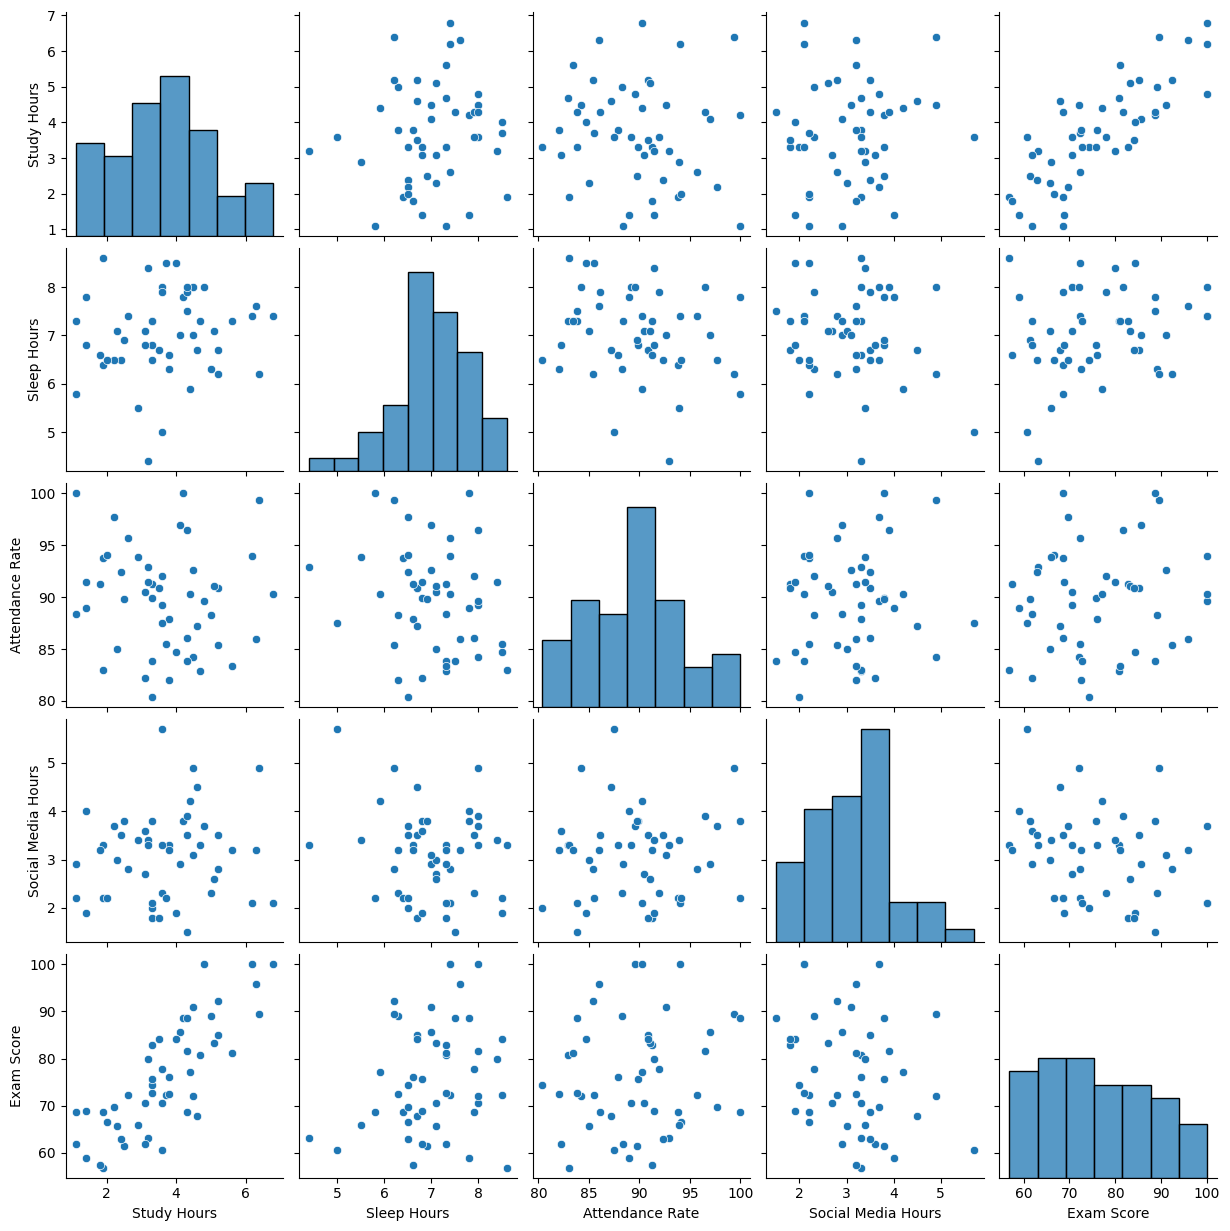

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


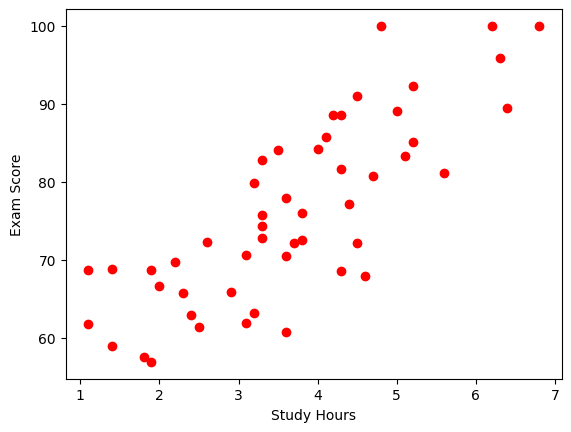

In [8]:
plt.scatter(df["Study Hours"],df["Exam Score"],color="r")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

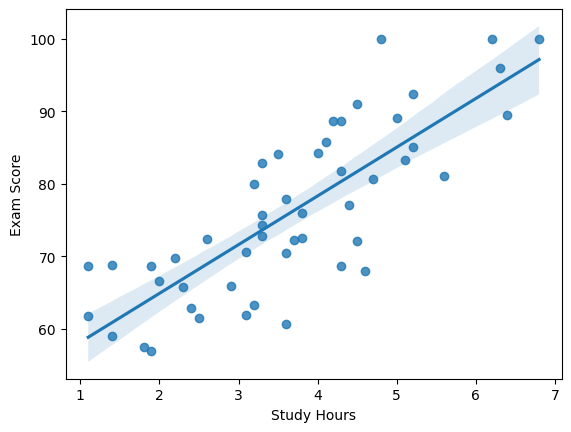

In [9]:
sns.regplot(x=df['Study Hours'], y=df['Exam Score'])
plt.show()

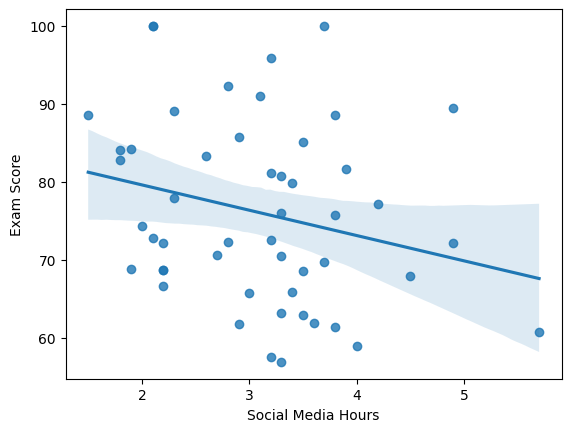

In [10]:
sns.regplot(x=df['Social Media Hours'], y=df['Exam Score'])
plt.show()

In [11]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [12]:
#independent and dependent feature
X=df.iloc[:,:-1] #son kolon hariç al
y=df.iloc[:,-1] #sadece son kolon al

# X=df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
# y=df["Exam Score"]

In [13]:
#train - test split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=150)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train,y_train)

LinearRegression()

In [21]:
#performance metrics
X_test[0]

array([-0.19517865,  0.4682801 ,  0.28704677, -1.50841091])

In [22]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [23]:
new_student = [[5,7,90,10]]

In [24]:
new_student_scaled = scaler.transform(new_student)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
regression.predict(new_student_scaled)

array([52.34030099])

In [26]:
# prediction

In [27]:
y_pred = regression.predict(X_test)

In [28]:
y_pred

array([ 81.6469424 , 104.32064674,  82.84074268,  87.48542266,
        64.65284522,  86.1255999 ,  66.28067601,  84.20034282,
        81.12661788,  84.86667878,  63.03495778,  76.43716765,
        83.15939464])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

print("mse: ",mse)
print("mae: ", mae)

mse:  40.31943017110669
mae:  4.750858323138503


In [31]:
score = r2_score(y_test, y_pred)
print("r2 score: ",score)

r2 score:  0.7644774248646267


In [32]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.64671613729694

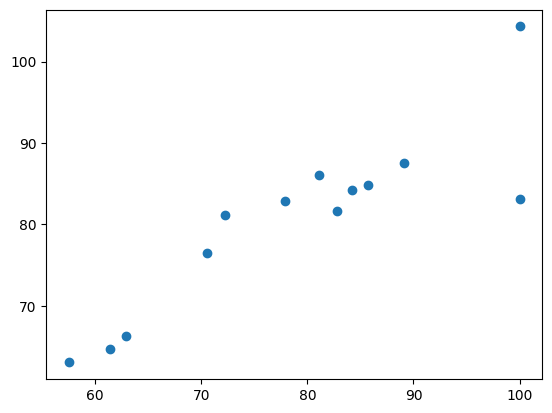

In [33]:
plt.scatter(y_test, y_pred)
plt.show()

In [36]:
residuals = y_test - y_pred

In [37]:
print(residuals)

8      1.153058
31    -4.320647
5     -4.940743
2      1.614577
16    -3.252845
47    -5.025600
33    -3.380676
32    -0.000343
21    -8.926618
22     0.833321
44    -5.534958
4     -5.937168
9     16.840605
Name: Exam Score, dtype: float64


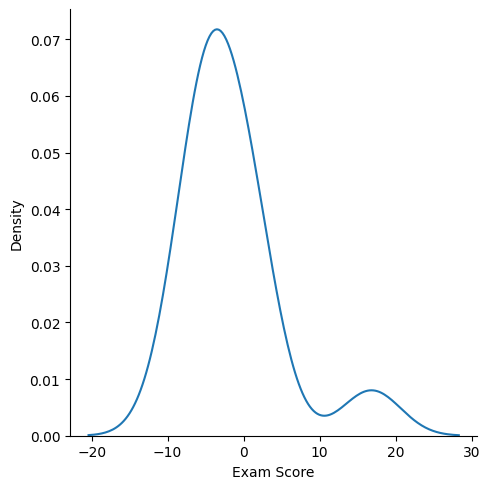

In [39]:
sns.displot(residuals, kind="kde")
plt.show()

In [41]:
regression.intercept_

np.float64(75.08648648648649)

In [42]:
regression.coef_

array([ 9.81636276,  1.59476332,  3.24504362, -4.50681247])

In [43]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [45]:
new_student

[[5, 7, 90, 10]]

In [46]:
students = [
    [6,8,95,4],
    [3,6,85,4],
    [4,7,80,3]
]

In [47]:
regression.predict(scaler.transform(students))

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([93.43986441, 62.60428224, 73.23441975])